In this notebook, I test my MCMC fitting. 

Text(0.5,1,'ABC123 vs $\\mathrm{ABC123}^{123}$')

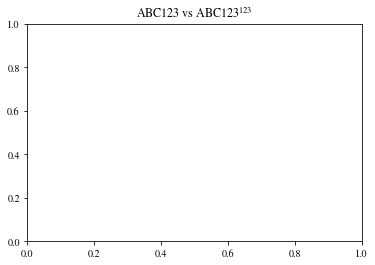

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import corner
sys.path.append(os.path.abspath('../src/'))
import global_signal_black_holes_mcmc as GSBH_MCMC
import global_signal_black_holes as GSBH
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

In [2]:
sampler=GSBH_MCMC.Sampler('../config/analytic_test.yaml')

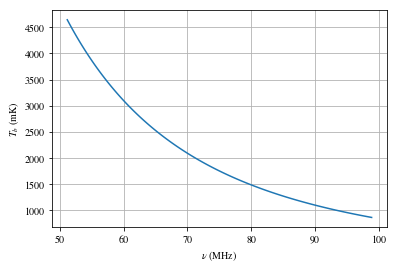

In [3]:
plt.plot(sampler.freqs,sampler.tb_meas)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.grid()

Here is the filtered variance. 

Text(0,0.5,'Var($T_b$) (mK)')

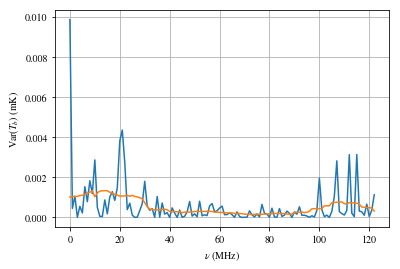

In [4]:
plt.plot(np.abs(sampler.dtb)**2.)
plt.plot(sampler.var_tb)
plt.grid()
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('Var($T_b$) (mK)')

Fit only foregrounds

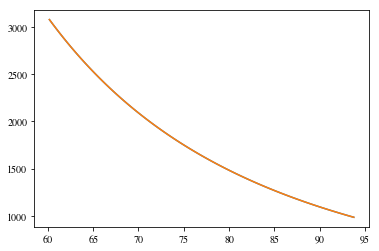

In [5]:
sampler=GSBH_MCMC.Sampler('../config/analytic_test.yaml',fmin=60,fmax=94)
params_nofg=[]
params_fg=[]
for pname in sampler.params_vary:
    if 'APOLY' not in pname:
        params_nofg=params_nofg+[pname]
    else:
        params_fg=params_fg+[pname]
sampler.gradient_descent(params_fg)
plt.plot(sampler.freqs,sampler.model)
plt.plot(sampler.freqs,sampler.tb_meas)

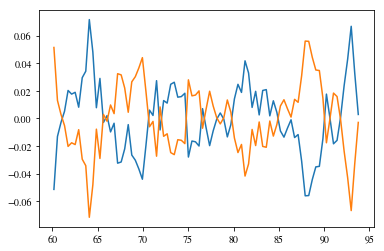

In [6]:
plt.plot(sampler.freqs,sampler.model-sampler.tb_meas)
plt.plot(sampler.freqs,sampler.resid)

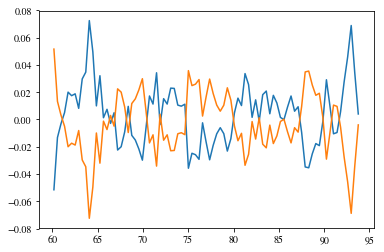

In [7]:
sampler=GSBH_MCMC.Sampler('../config/analytic_test.yaml',fmin=60,fmax=94)
params_nofg=[]
params_fg=[]
for pname in sampler.params_vary:
    if 'APOLY' not in pname:
        params_nofg=params_nofg+[pname]
    else:
        params_fg=params_fg+[pname]
sampler.gradient_descent(params_fg)
sampler.gradient_descent(params_nofg)
plt.plot(sampler.freqs,sampler.model-sampler.tb_meas)
plt.plot(sampler.freqs,sampler.resid)

{'NU0': 78.19248036181872, 'TAU': 6.208755070598689, 'A': 0.5723449611418114, 'W': 18.686475220322485, 'NPOLY': 5, 'APOLY0': 1713.543422362702, 'APOLY1': -20.5201242466218, 'APOLY2': -47.55702974320953, 'APOLY3': -29.827862116910644, 'APOLY4': 22.566522334401974}


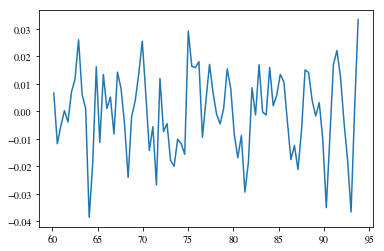

In [8]:
sampler=GSBH_MCMC.Sampler('../config/analytic_test.yaml',fmin=60.,fmax=94)
params_nofg=[]
params_fg=[]
for pname in sampler.params_vary:
    if 'APOLY' not in pname:
        params_nofg=params_nofg+[pname]
    else:
        params_fg=params_fg+[pname]
sampler.gradient_descent(params_fg)
sampler.gradient_descent(params_nofg)
sampler.gradient_descent()
print(sampler.params_all)
plt.plot(sampler.freqs,sampler.resid)

In [9]:
print(sampler.params_all)
print(len(sampler.params_all))

{'NU0': 78.19248036181872, 'TAU': 6.208755070598689, 'A': 0.5723449611418114, 'W': 18.686475220322485, 'NPOLY': 5, 'APOLY0': 1713.543422362702, 'APOLY1': -20.5201242466218, 'APOLY2': -47.55702974320953, 'APOLY3': -29.827862116910644, 'APOLY4': 22.566522334401974}
10


In [10]:
sampler=GSBH_MCMC.Sampler('../config/analytic_test.yaml',fmin=60.,fmax=94)
sampler.sample()

{'NU0': 78.19248036181872, 'TAU': 6.208755070598689, 'A': 0.5723449611418114, 'W': 18.686475220322485, 'NPOLY': 5, 'APOLY0': 1713.543422362702, 'APOLY1': -20.5201242466218, 'APOLY2': -47.55702974320953, 'APOLY3': -29.827862116910644, 'APOLY4': 22.566522334401974}


In [11]:
print(sampler.sampler.chain.shape)
samples=sampler.sampler.chain[:, sampler.config['NBURN']:, :].reshape((-1, len(sampler.params_vary)))
print(samples.shape)
ml_samples=np.median(samples,axis=0)

(18, 5000, 9)
(72000, 9)


Lets take a look at the chains (after reomoving 10,0000 burn points). 

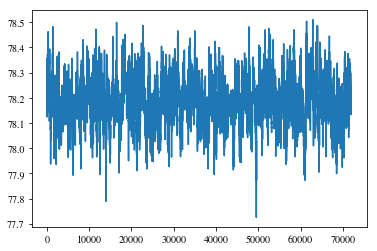

In [12]:
#plt.plot(samples[:,0])
plt.plot(samples[:,0])

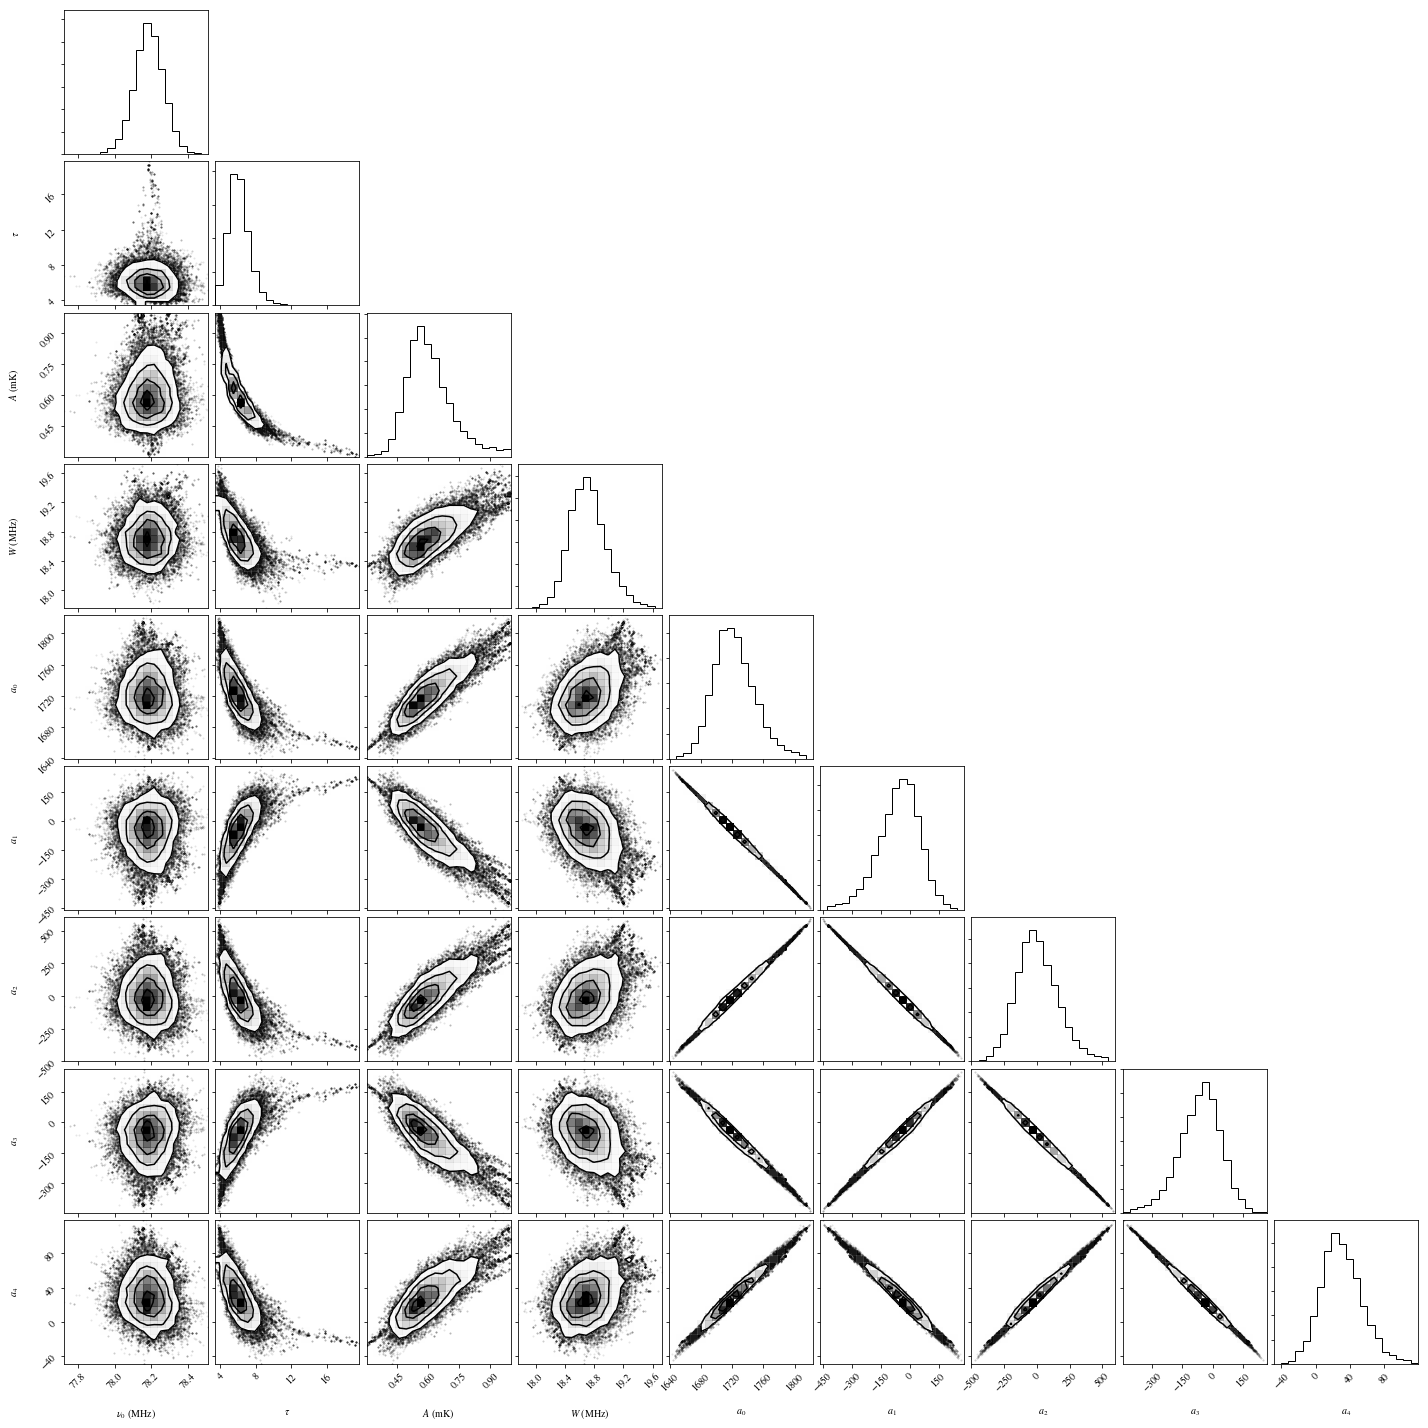

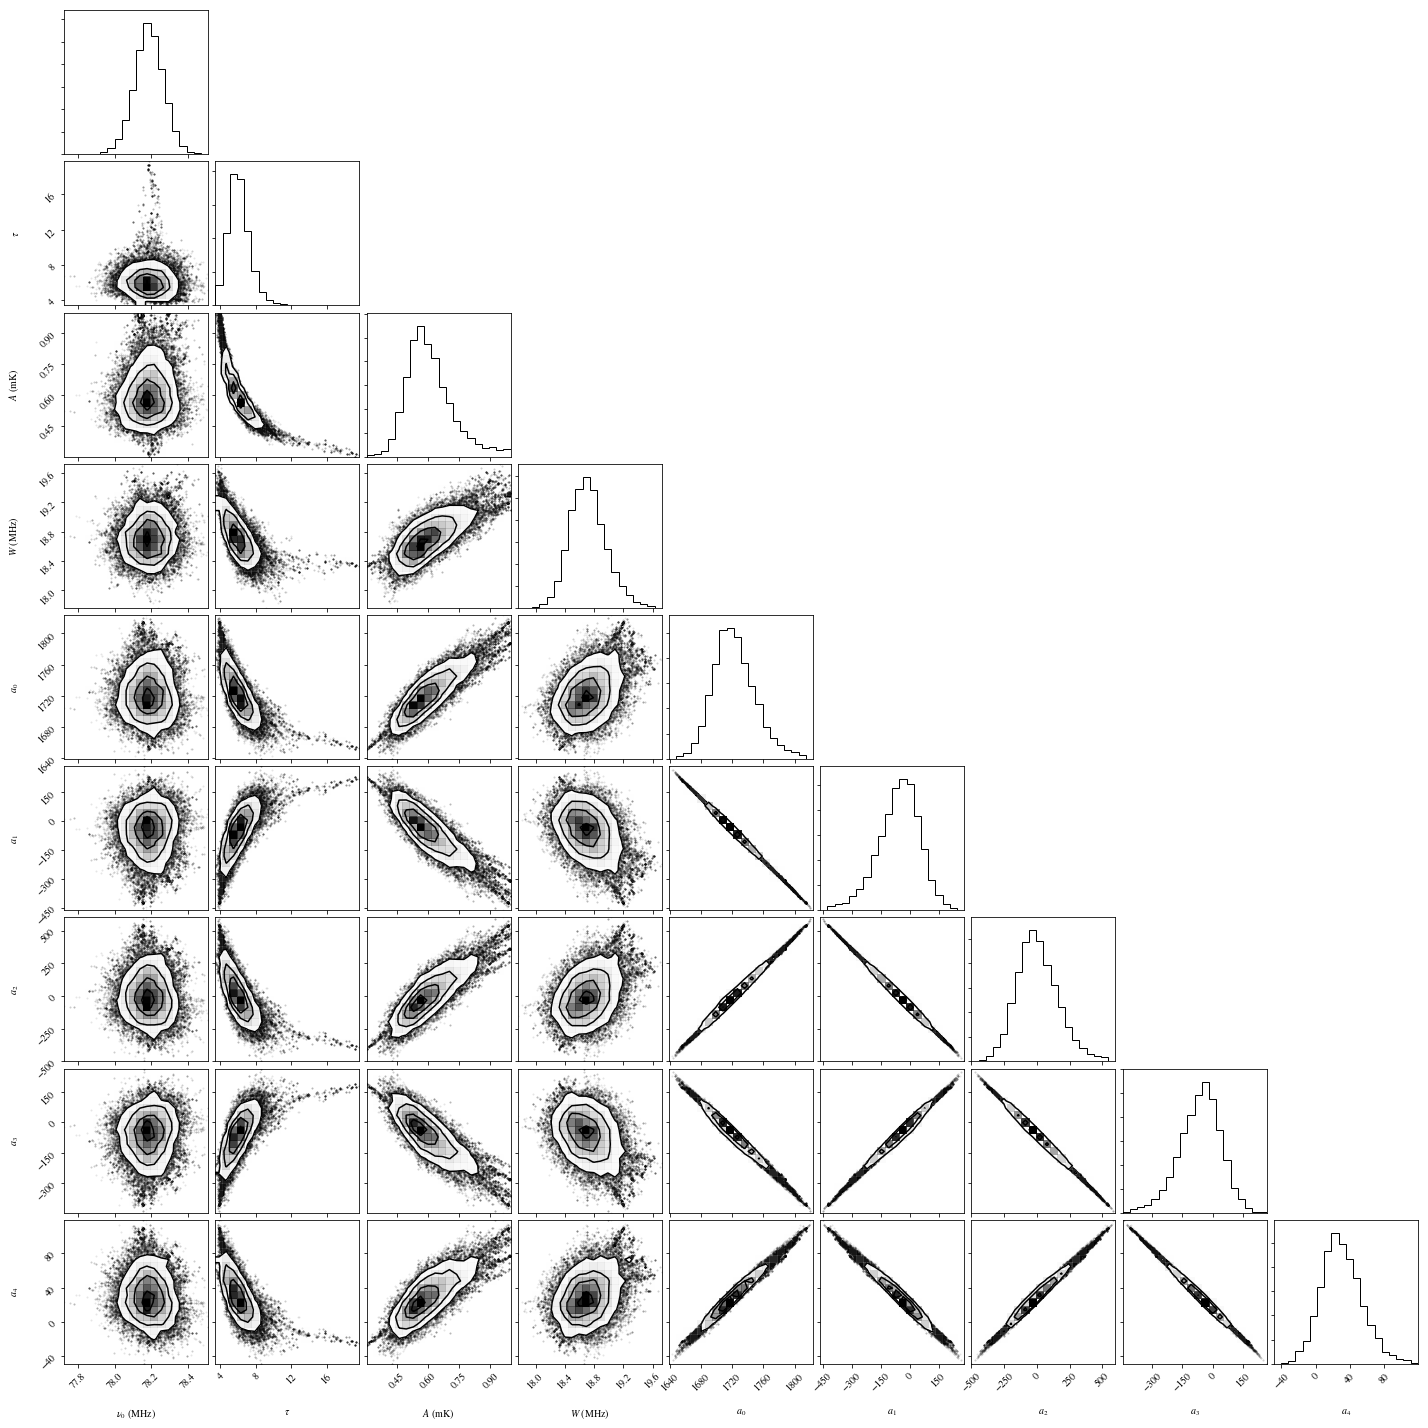

In [13]:
corner.corner(samples,
labels=('$\\nu_0$ (MHz)','$\\tau$','$A$ (mK)','$W$ (MHz)','$a_0$','$a_1$','$a_2$','$a_3$','$a_4$'))

Plot the maximum likelihood model, some draws, and the model

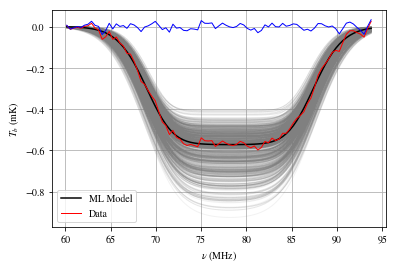

In [14]:
import imp
imp.reload(GSBH_MCMC)
ndraws=1000
for drawnum in range(ndraws):
    draw=np.random.randint(0,5000)
    params={'NU0':samples[draw,0],'TAU':samples[draw,1],'A':samples[draw,2],'W':samples[draw,3]}
    plt.plot(sampler.freqs,GSBH_MCMC.delta_Tb_analytic(sampler.freqs,**params),color='grey',lw=1,alpha=.1)
l1=plt.plot(sampler.freqs,GSBH_MCMC.TbSky(ml_samples,sampler.freqs,sampler.params_all,[],sampler.analytic)\
        -GSBH_MCMC.Tbfg(sampler.freqs,sampler.params_all),color='k')[0]
l2=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.Tbfg(sampler.freqs,sampler.params_all),color='r',lw=1)[0]
#l3=plt.plot(sampler.freqs,sampler.tb_meas-GSBH_MCMC.TbSky(ml_samples,sampler.freqs,
#sampler.params_all,[],sampler.analytic),color='blue',lw=1)[0]
l3=plt.plot(sampler.freqs,sampler.resid,color='blue',lw=1)[0]
#plt.ylim(-.6,.1)
plt.xlabel('$\\nu$ (MHz)')
plt.ylabel('$T_b$ (mK)')
plt.legend((l1,l2),('ML Model','Data'))
plt.grid()

Load up output and make the same plot. 

Next I will look into getting this running on Aurora. 